In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac
import warnings
warnings.filterwarnings('ignore')

In [121]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train (2).csv


In [122]:
salary_train = pd.read_csv('SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [123]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test (2).csv


In [124]:
salary_test = pd.read_csv('SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [125]:
# Merging Train and Test Data
raw_data = salary_train.append(salary_test)
raw_data.reset_index(inplace=True)
raw_data

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [126]:
raw_data.drop('index',axis=1,inplace=True)

#EDA

In [127]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [128]:
raw_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [129]:
raw_data.shape

(45221, 14)

In [130]:
raw_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [131]:
raw_data[raw_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


#Numerical Variables

In [132]:
numerical_variables = [i for i in raw_data.columns if raw_data[i].dtypes != 'O']

print('Number of numerical variables:', len(numerical_variables))

raw_data[numerical_variables].head()

Number of numerical variables: 5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


Discrete Variables

In [133]:
discrete_variables = [i for i in numerical_variables if len(raw_data[i].unique())<25]
print('Discrete Variables: ',len(discrete_variables))

Discrete Variables:  1


Continuous Variables

In [134]:
continuous_variables = [i for i in numerical_variables if i not in discrete_variables]
print('Continuous Variables: ',len(continuous_variables))

Continuous Variables:  4


Categorical Variables

In [135]:
categorical_variables = [i for i in raw_data.columns if raw_data[i].dtype=='O']
print('Categorical Variables: ',len(categorical_variables))

Categorical Variables:  9


In [136]:
categorical_variables

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

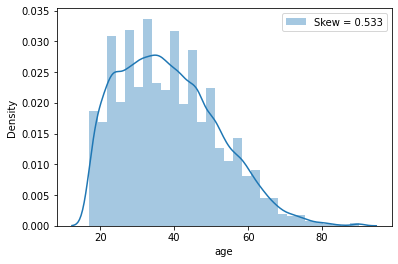

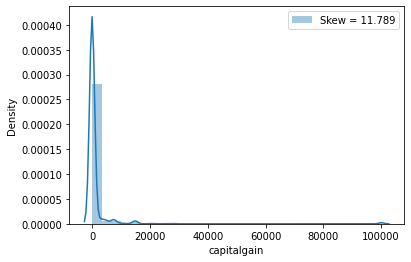

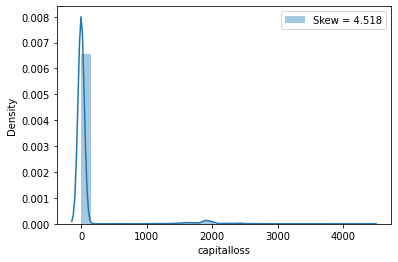

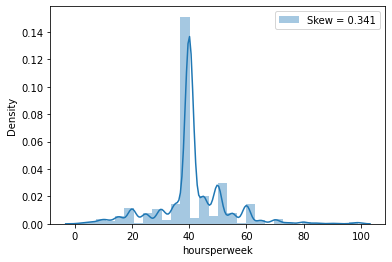

In [137]:
for i in continuous_variables:
    skew = raw_data[i].skew()
    sns.distplot(raw_data[i], kde= True, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

#Outliers Detection

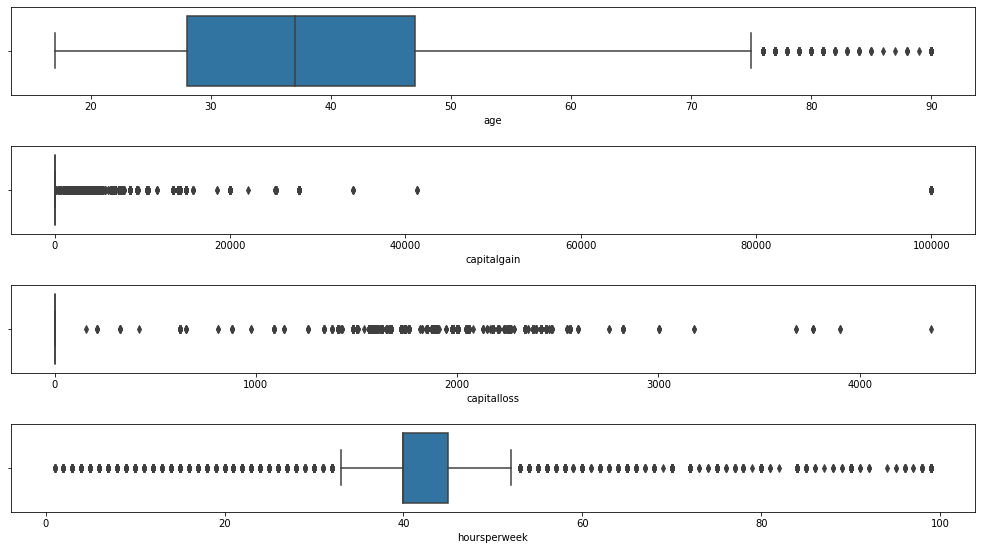

In [138]:
d = raw_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8))
sns.boxplot(x='age',data=d,ax=axes[0])
sns.boxplot(x='capitalgain',data=d,ax=axes[1])
sns.boxplot(x='capitalloss',data=d,ax=axes[2])
sns.boxplot(x='hoursperweek',data=d,ax=axes[3])
plt.tight_layout(pad=2.0)
plt.show()

#Data Visualization

Barplot for Categorical variables

Text(0.5, 1.0, 'Working Class')

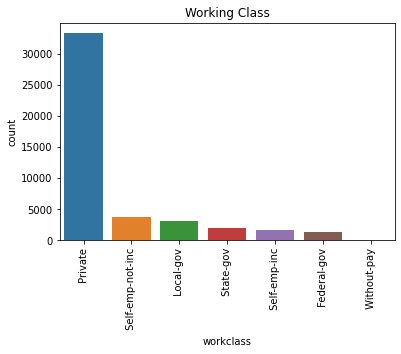

In [139]:
sns.countplot(x='workclass', data=raw_data, order=raw_data['workclass'].value_counts().index);
plt.xticks(rotation = 90,fontsize = 10)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

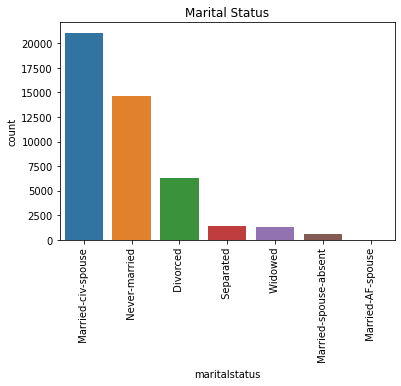

In [140]:
sns.countplot(x='maritalstatus', data=raw_data, order=raw_data['maritalstatus'].value_counts().index);
plt.xticks(fontsize = 10,rotation = 90)
plt.title('Marital Status')

Text(0.5, 1.0, 'Occupation')

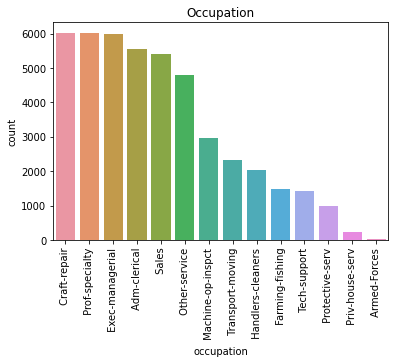

In [141]:
sns.countplot(x='occupation', data=raw_data, order=raw_data['occupation'].value_counts().index);
plt.xticks(fontsize = 10,rotation = 90)
plt.title('Occupation')

Text(0.5, 1.0, 'Education')

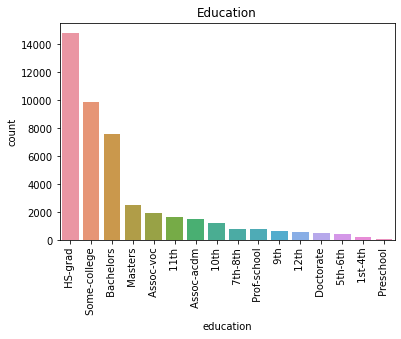

In [142]:
sns.countplot(x='education', data=raw_data, order=raw_data['education'].value_counts().index);
plt.xticks(fontsize = 10,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Relationship')

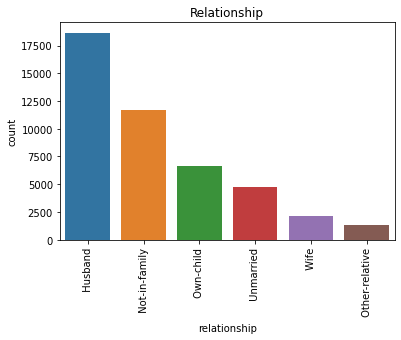

In [143]:
sns.countplot(x='relationship', data=raw_data, order=raw_data['relationship'].value_counts().index)
plt.xticks(fontsize = 10,rotation = 90)
plt.title('Relationship')

Text(0.5, 1.0, 'Race')

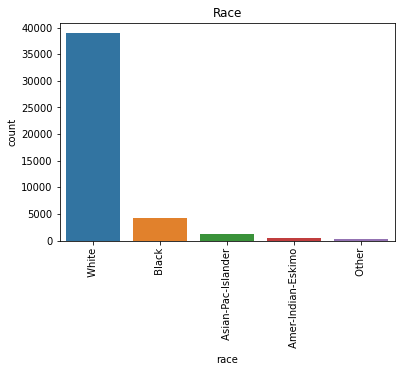

In [144]:
sns.countplot(x='race', data=raw_data, order=raw_data['race'].value_counts().index)
plt.xticks(fontsize = 10,rotation=90)
plt.title('Race')

Text(0.5, 1.0, 'Sex')

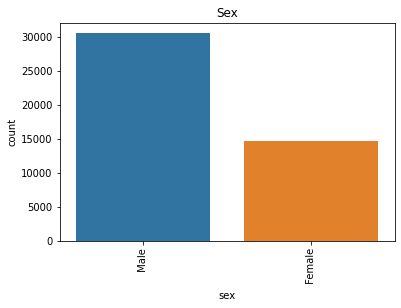

In [145]:
sns.countplot(x='sex', data=raw_data, order=raw_data['sex'].value_counts().index)
plt.xticks(fontsize = 10,rotation=90)
plt.title('Sex')

Text(0.5, 1.0, 'Native')

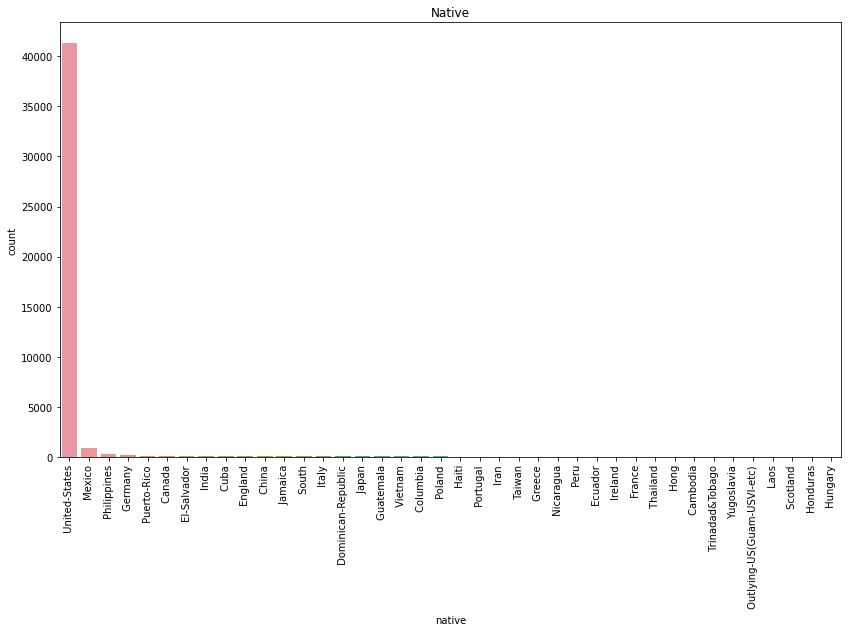

In [146]:
plt.figure(figsize=(14,8))
sns.countplot(x='native', data=raw_data, order=raw_data['native'].value_counts().index)
plt.xticks(fontsize = 10,rotation=90)
plt.title('Native')

Employee Salary Distribution

Text(0.5, 1.0, 'Salary')

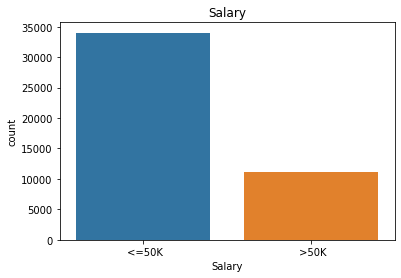

In [147]:
sns.countplot(x='Salary', data=raw_data, order=raw_data['Salary'].value_counts().index, );
plt.xticks(fontsize = 10)
plt.title('Salary')

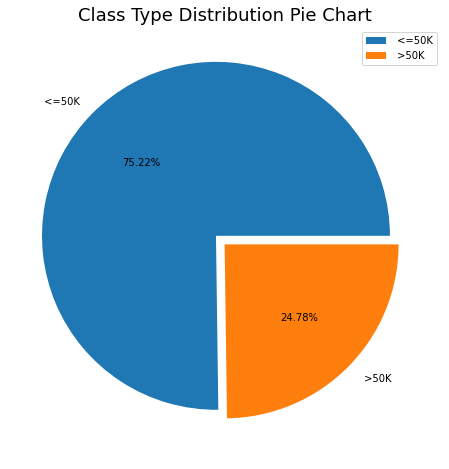

In [148]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['Salary'].value_counts(),
       labels=raw_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%')
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18)
plt.show()

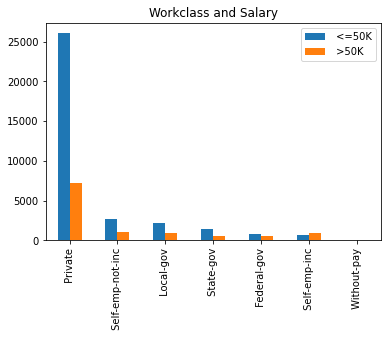

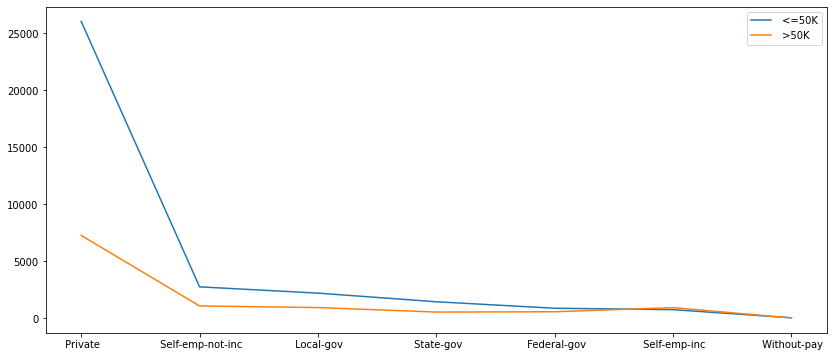

In [149]:
# Comparing Workclass and Salary
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['workclass'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['workclass'].value_counts()
df.plot.bar(title = 'Workclass and Salary')
df.plot(figsize=(14,6));

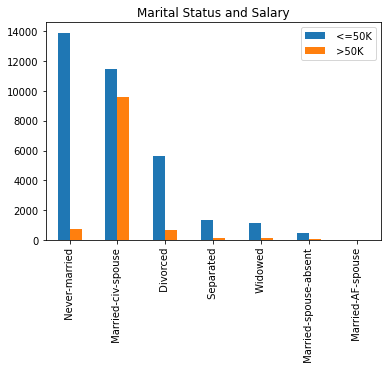

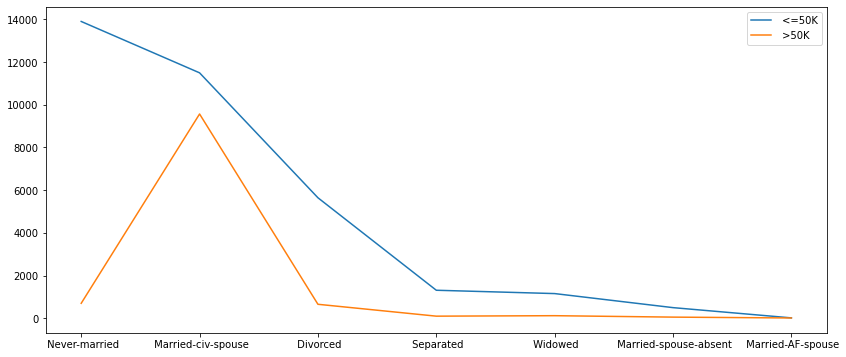

In [150]:
# Comparing Marital status and Salary
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['maritalstatus'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['maritalstatus'].value_counts()
df.plot.bar(title = 'Marital Status and Salary')
df.plot(figsize=(14,6));

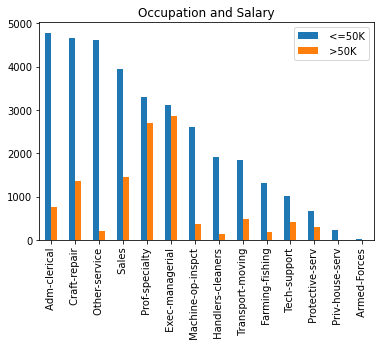

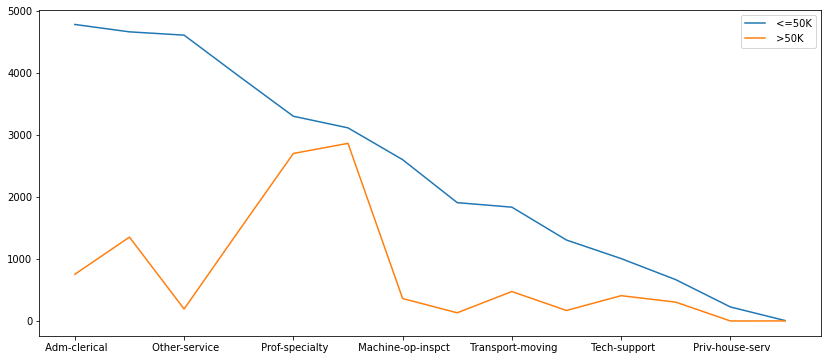

In [151]:
# Comparing Occupation and Salary
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['occupation'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['occupation'].value_counts()
df.plot.bar(title = 'Occupation and Salary')
df.plot(figsize=(14,6));

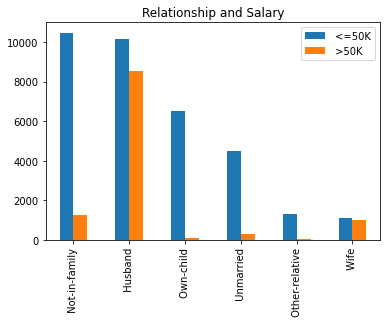

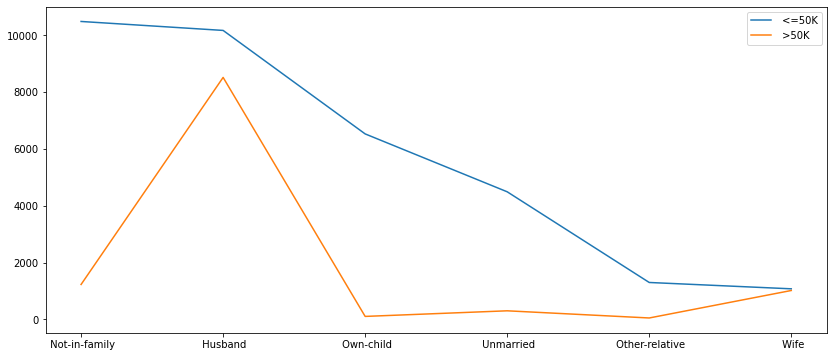

In [152]:
# Comparing Relationship and Salary
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['relationship'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['relationship'].value_counts()
df.plot.bar(title = 'Relationship and Salary')
df.plot(figsize=(14,6));

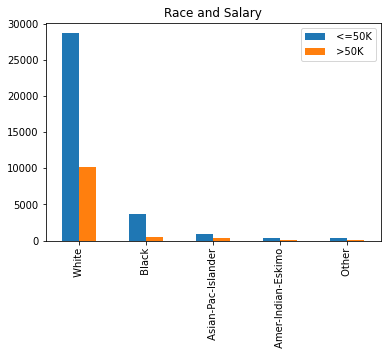

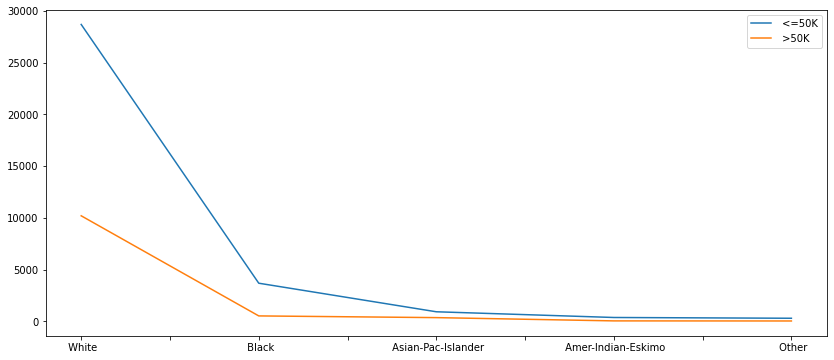

In [153]:
# Comparing Race and Salary
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['race'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['race'].value_counts()
df.plot.bar(title = 'Race and Salary')
df.plot(figsize=(14,6));

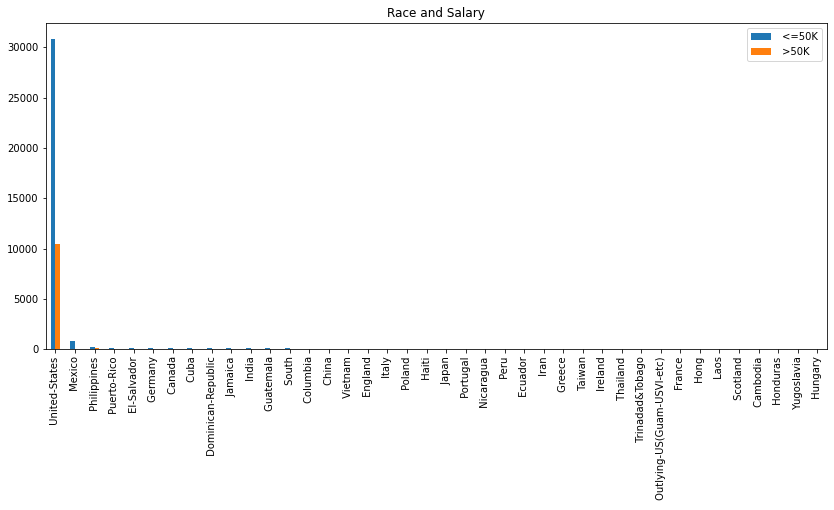

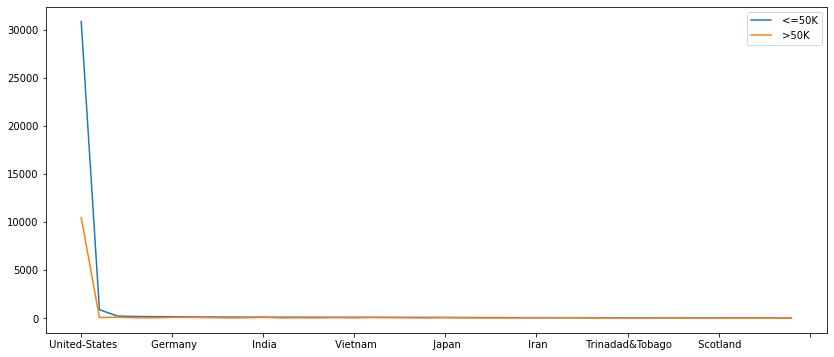

In [154]:
# Comparing Native and Salary
df = pd.DataFrame()

df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['native'].value_counts()
df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['native'].value_counts()
df.plot.bar(title = 'Race and Salary',figsize=(14,6))
df.plot(figsize=(14,6));

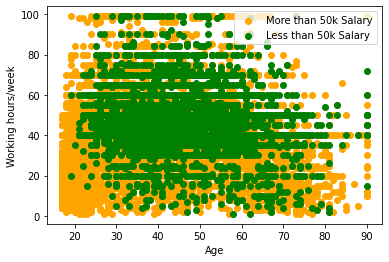

In [155]:
# Scatter Plot
plt.scatter(x=raw_data.age[raw_data.Salary== ' <=50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' <=50K')], c="orange")
plt.scatter(x=raw_data.age[raw_data.Salary== ' >50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' >50K')], c="g")
plt.legend(["More than 50k Salary", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

Visualizing Salary and Employee rate by Age

In [156]:
raw_data.age.value_counts()

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
88       5
85       5
86       1
89       1
87       1
Name: age, Length: 74, dtype: int64

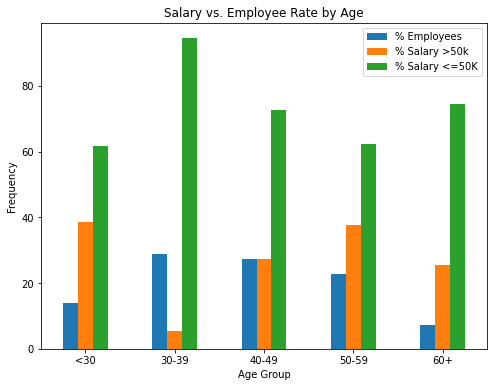

In [157]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age['% Salary <=50K'] = count_age_response_pct[' <=50K']
age.drop('age_group',axis = 1,inplace = True)
age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Employees','% Salary >50k','% Salary <=50K']].plot(kind = 'bar', figsize=(8,6))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')
plt.show()

Visualize the Salary rate by Workclass

In [158]:
count = pd.crosstab(raw_data['Salary'],raw_data['workclass']).apply(lambda x: x/x.sum() * 100)
count

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Salary,,,,,,,
<=50K,60.953058,70.483871,78.229148,44.592953,72.102213,73.27852,90.47619
>50K,39.046942,29.516129,21.770852,55.407047,27.897787,26.72148,9.52381


In [159]:
count = count.transpose()
count

Salary,<=50K,>50K
workclass,,
Federal-gov,60.953058,39.046942
Local-gov,70.483871,29.516129
Private,78.229148,21.770852
Self-emp-inc,44.592953,55.407047
Self-emp-not-inc,72.102213,27.897787
State-gov,73.278520,26.721480
Without-pay,90.476190,9.523810


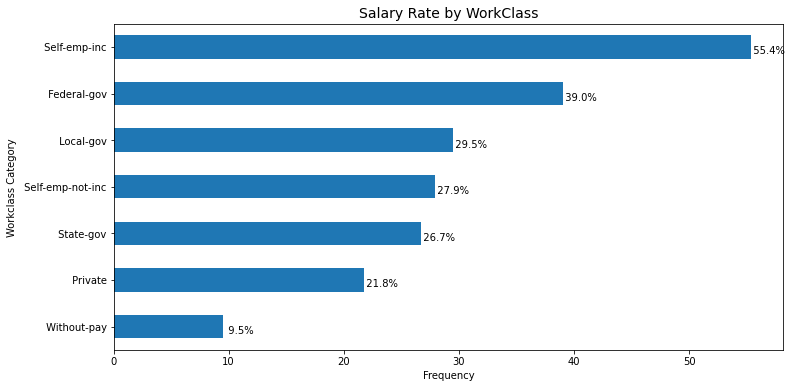

In [160]:
plot = count[' >50K'].sort_values(ascending = True).plot(kind ='barh', figsize = (12,6))                             
plt.title('Salary Rate by WorkClass', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Workclass Category')

# Label each bar
for rec, label in zip(plot.patches,
                      count[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  '  '+label+'%', 
                  ha = 'center')
plt.show()

Visualize the Salary rate by Education

In [161]:
count = pd.crosstab(raw_data['Salary'],raw_data['education']).apply(lambda x: x/x.sum() * 100)
count

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Salary,,,,,,,,,,,,,,,,
<=50K,93.295176,94.502779,92.54766,96.396396,95.100223,93.317132,94.378698,73.589914,74.272588,58.018494,26.654412,83.656903,44.590294,98.611111,24.585987,79.894928
>50K,6.704824,5.497221,7.45234,3.603604,4.899777,6.682868,5.621302,26.410086,25.727412,41.981506,73.345588,16.343097,55.409706,1.388889,75.414013,20.105072


In [162]:
count = count.transpose()
count

Salary,<=50K,>50K
education,,
10th,93.295176,6.704824
11th,94.502779,5.497221
12th,92.547660,7.452340
1st-4th,96.396396,3.603604
5th-6th,95.100223,4.899777
7th-8th,93.317132,6.682868
9th,94.378698,5.621302
Assoc-acdm,73.589914,26.410086
Assoc-voc,74.272588,25.727412


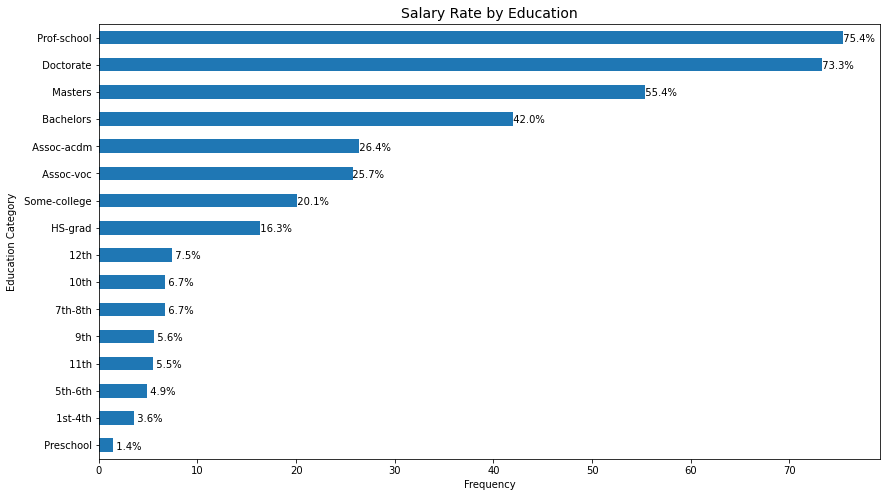

In [163]:
plot = count[' >50K'].sort_values(ascending = True).plot(kind ='barh', figsize = (14,8))                             
plt.title('Salary Rate by Education', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot.patches,
                      count[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  '  '+label+'%', 
                  ha = 'center')
plt.show()

#Data Pre-Processing

In [164]:
data = raw_data.copy()
data.drop('Salary',axis=1, inplace =True)
data = pd.get_dummies(data.iloc[:,:])

In [165]:
data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,age_group,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,30.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,50.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,30.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,50.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,20.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
data['Salary'] = raw_data.Salary

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data["Salary"])
data["Salary"] = le.transform(data["Salary"])
data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,age_group,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,30.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,50.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,30.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,50.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,20.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#Label Encoding Technique

In [167]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data = raw_data.copy()
data["education"]=le.fit_transform(data["education"])
data["workclass"]=le.fit_transform(data["workclass"])
data["maritalstatus"]=le.fit_transform(data["maritalstatus"])
data["sex"]=le.fit_transform(data["sex"])
data["race"]=le.fit_transform(data["race"])
data["occupation"]=le.fit_transform(data["occupation"])
data["relationship"]=le.fit_transform(data["relationship"])
data["native"]=le.fit_transform(data["native"])
data['Salary'] = np.where(data['Salary'].str.contains(" >50K"), 1, 0)

In [168]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0,30.0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0,50.0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0,30.0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0,50.0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0,20.0


In [169]:
x = data.drop('Salary',axis=1)
y = data['Salary']

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [171]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (31654, 14)
Shape of x_test:  (13567, 14)
Shape of y_train:  (31654,)
Shape of y_test:  (13567,)


#Handling imbalance data

In [172]:
x = data.drop(['Salary'], axis=1)
y = data['Salary']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (31654, 14)
Shape of x_test:  (13567, 14)
Shape of y_train:  (31654,)
Shape of y_test:  (13567,)


**1) SMOTE Approach**

In [173]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

counter = Counter(y_train_smote)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({0: 23809, 1: 23809})


**2) ADASYN (Adaptive Synthetic Sampling Approach)**

In [174]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using ADASYN
adasyn = ADASYN(random_state=130)
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train, y_train)

counter = Counter(y_train_adasyn)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({0: 23809, 1: 22997})


**3) Hybridization: SMOTE + ENN**

In [176]:
from imblearn.combine import SMOTETomek, SMOTEENN

counter = Counter(y_train)
print('Before',counter)

# Oversampling the train dataset using SMOTE + ENN
smoteenn = SMOTEENN()
x_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smoteenn)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({1: 18473, 0: 16382})


SMOTE + ENN sampling technique works better, so we continue with this.

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smoteenn,y_train_smoteenn,test_size=0.3,random_state=1, stratify=y_train_smoteenn)

counter = Counter(y_train_smoteenn)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({1: 18473, 0: 16382})
After Counter({1: 12931, 0: 11467})
Shape of X_train:  (24398, 14)
Shape of X_test:  (10457, 14)
Shape of y_train:  (24398,)
Shape of y_test (10457,)


#Naive Bayes Classifier

Bayes theorem is stated as:
P(A|B) = P(B|A)* P(A)/ P(B)

where:
P(A|B) is the probability of event A occurring, given that event B has occurred
P(B|A) is the probability of event B occurring, given that event A has occurred
P(A) is the probability of the event A
P(B) is the probability of the event B

There are 3 types of Naïve Bayes algorithm & models that can be built:-

1.   Gaussian Naïve Bayes
2.   Multinomial Naïve Bayes
3.   Bernoulli Naïve Bayes


Bernoulli: Binomial Distribution, Binary Categorical Variables

Multinomial: Multinomial Distribution, Multinomial Categorical Variables

Gaussian:	Normal Distribution, Continuous Variables

In [178]:
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, GaussianNB

model1 = GaussianNB()
model2 = MultinomialNB()
model3 = CategoricalNB()

# fit the model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

print(model1,model2,model3)

GaussianNB() MultinomialNB() CategoricalNB()


In [179]:
from sklearn.metrics import accuracy_score

#Predictions
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

print('GaussianNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))
print('MultinomialNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))
print('CategoricalNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred3)))

GaussianNB Model accuracy score: 0.8083
MultinomialNB Model accuracy score: 0.5808
CategoricalNB Model accuracy score: 0.9264


In [192]:
from sklearn.metrics import classification_report as cr

print('\033[1m'+'GaussianNB Model\n'+'\033[0m',cr(y_test, y_pred1))
print('\033[1m'+'\n\nMultinomialNB Model\n'+'\033[0m',cr(y_test, y_pred2))
print('\033[1m'+'\n\nCategoricalNB Model\n'+'\033[0m',cr(y_test, y_pred3))

GaussianNB Model
               precision    recall  f1-score   support

           0       0.74      0.92      0.82      4915
           1       0.91      0.71      0.80      5542

    accuracy                           0.81     10457
   macro avg       0.82      0.81      0.81     10457
weighted avg       0.83      0.81      0.81     10457



MultinomialNB Model
               precision    recall  f1-score   support

           0       0.53      0.94      0.68      4915
           1       0.84      0.26      0.40      5542

    accuracy                           0.58     10457
   macro avg       0.68      0.60      0.54     10457
weighted avg       0.69      0.58      0.53     10457



CategoricalNB Model
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      4915
           1       0.91      0.95      0.93      5542

    accuracy                           0.93     10457
   macro avg       0.93      0.92      0.93     10457
weighted a

Categorical Naive Bayes scored better accuracy, F1 score, precision. Hence, we consider using the Categorical Model.

In [194]:
print('Training set score: {:.2f}%'.format(model3.score(x_train, y_train)*100))
print('Test set score: {:.2f}%'.format(model3.score(x_test, y_test)*100))

Training set score: 92.29%
Test set score: 92.64%


In [193]:
# Calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

1    0.52998
Name: Salary, dtype: float64

This implies that a dumb model has 53% chance to predicts 0 correctly.

So here accuracy is not that good as it's close to a dumb model.

In [195]:
# Using Confusion matrix
from sklearn.metrics import confusion_matrix as cm


y_predict = model3.predict(x_test)

print(cm(y_test, y_predict))

[[4398  517]
 [ 253 5289]]


In [196]:
# use float to perform true division, not integer division
c = cm(y_test, y_predict)
TP = c[1, 1]
TN = c[0, 0]
FP = c[0, 1]
FN = c[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y_test, y_predict))

0.9263651142775174
0.9263651142775174


In [199]:
# Classification Error
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - ac(y_test, y_predict))

0.07363488572248254
0.07363488572248256


In [200]:
# Recall
from sklearn.metrics import recall_score
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, y_predict))

0.9543486106098882
0.9543486106098882


In [201]:
# Specificity
specificity = TN / (TN + FP)

print(specificity)

0.8948118006103764


In [202]:
# False Positive Rate
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.10518819938962361
0.10518819938962365


In [203]:
# Precision
from sklearn.metrics import precision_score
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_predict))

0.9109541853255253
0.9109541853255253


In [204]:
# F1 score
f1_score = 2*((precision_score(y_test, y_predict) * recall_score(y_test, y_predict))/(precision_score(y_test, y_predict) + recall_score(y_test, y_predict)))
f1_score

0.932146633768065

Classification Report

In [206]:
print(cr(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4915
           1       0.91      0.95      0.93      5542

    accuracy                           0.93     10457
   macro avg       0.93      0.92      0.93     10457
weighted avg       0.93      0.93      0.93     10457



# Model Predictions

In [207]:
y_pred = model3.predict(x_train_smoteenn)

# Creating a dataframe actual value and predicted value
predict = pd.DataFrame({'Actual':y_train_smoteenn,'Predicted':y_pred})
predict

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
34850,1,1
34851,1,1
34852,1,1
34853,1,1


#Conclusion

**Hence,** 

**1.   SMOTE + ENN model accuracy score is 90% and  training-set accuracy score is 92%. So, there is no sign of overfitting.**

**2.   Categorical Naive Bayes has null accuracy score which is 53%. So, Categorical Naive Bayes classifier model is better in predicting the class labels.** 

